# Machine Learning on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)�, where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s




I**mport the required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Load the Boston Housing DataSet from scikit-learn**

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

**Load the data into pandas dataframe**

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe**

In [4]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 1. Data understanding and preprocessing - Check if any of the feature variables have null values - 50 pts

**1.0 Check for missing values** - 10 pts

In [5]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**1.1. Data Visualization** - Plot histogram for median housing prices - 15 pts

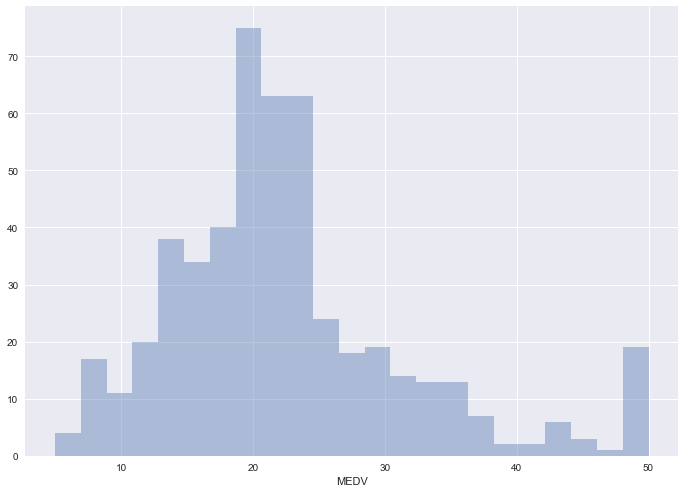

In [6]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], kde=False, hist = True)

**1.2. Correlation matrix** - Check if there is any corelation between the variables of the features. Present observations - 25 pts

In [7]:
# compute the pair wise correlation for all columns  
corr = boston.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


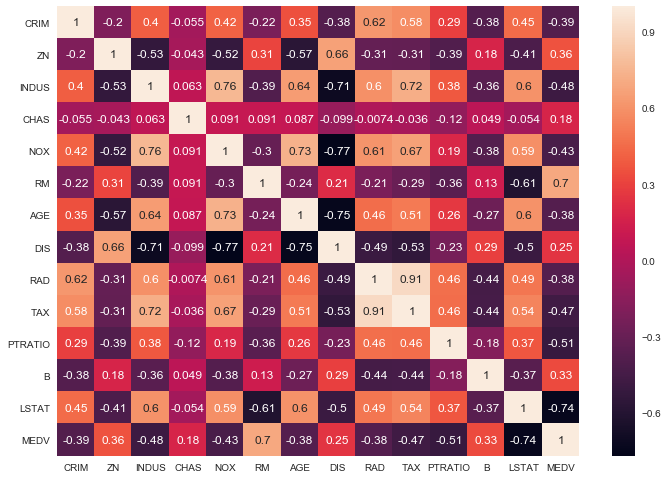

In [8]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square. Use sns.heatmap
sns.heatmap(corr, annot=True)

**Observations**
- Describe the observations from the heatmap. Talk about relationships between variables





My Observations:
There are both positive and negative correlations between variables in this dataframe.

For example, the correlation between MEDV and RM is 0.7, which is a good positive correlation and correlation between MEDV and LSTAT is -0.74 which is negative correlation.

The highest negative correlation is between NOX and DIS at -0.77.

CHAS is the only variable which is neither highly positive correlated nor highly negatively correlated to any other variable.

**Confirm Corelations** - Show corelations between median value and 2-3 other variables using a scatter plot

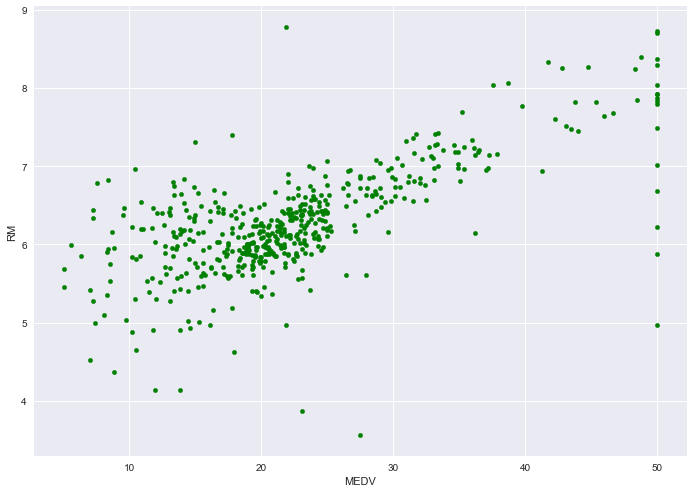

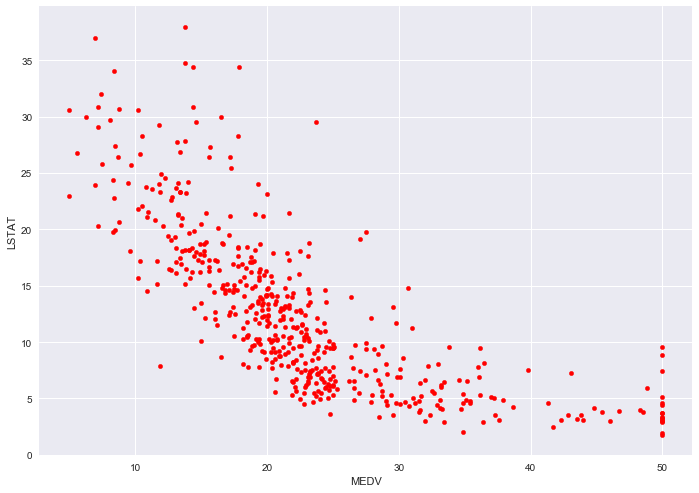

In [9]:
#Scatterplot for MEDV and RM (positive correlation)
ax1 = boston.plot(kind='scatter', x='MEDV', y='RM', color='g')    

#Scatterplot for MEDV and LSTAT (negative correlation)
ax2 = boston.plot(kind='scatter', x='MEDV', y='LSTAT', color='r')

### 2. Create an Basic Linear Regression model using Sci-Kit (sklearn) - 35 pts

**2.0 Prepare the data for training** - 5 pts

In [10]:
#Data is ready for training
from sklearn.linear_model import LinearRegression

**2.1 Create Validation Data** - Split the data into training and testing sets - 5pts

In [11]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
train_x, test_x, train_y, test_y = train_test_split(boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']], boston['MEDV'], train_size=0.8, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


**2.2. Train the model using sklearn LinearRegression** - 5 pts

In [12]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**2.3 Evaluate model** - Use R2 and RMSE scores for the training and validation data - 10 pts

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

predictions = model.predict(test_x)

# model evaluation for training set
print("MSE for training = ",mean_squared_error(train_y, model.predict(train_x)))


# model evaluation for testing set
print("\nMSE for testing = ",mean_squared_error(test_y, predictions))

# root mean square error of the model
rmse = sqrt(mean_squared_error(test_y, predictions))
print("\nRMSE = ",rmse)

# r-squared score of the model
print("\nr2_score = ",r2_score(test_y, predictions))

MSE for training =  21.641574096655585

MSE for testing =  24.311426929692733

RMSE =  4.930661915979713

r2_score =  0.6684825753971688


**2.4 Plot the Linear Regression Model** - 10 pts 

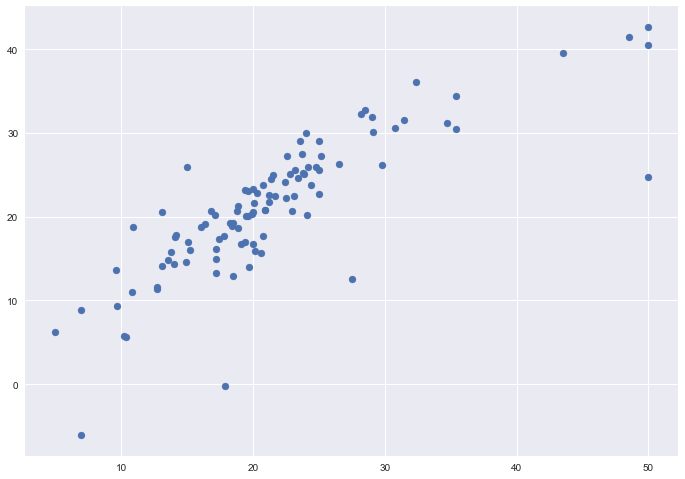

In [14]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
import matplotlib.pyplot as plt

plt.scatter(test_y, predictions);

## 3. Effect of Dimensionality - Evaluate the Effect of Dimensionality Reduction - 35 pts

**3.0 Dimensionality  Reduction** - Test number of components 2 - 12 for PCA - 15 pts

In [15]:
# instantiate PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [16]:
#create new X and Y
X, Y = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']], boston['MEDV']

In [17]:
#fit pca
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**3.1 Transform original data to the PCA components** - 5 pts

In [18]:
X_reduced = pca.transform(X)

Create train test split

In [19]:
pca_train_x, pca_test_x, pca_train_y, pca_test_y = train_test_split(X_reduced, boston['MEDV'], train_size=0.8, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


**3.2 Fit linear regression model and evaluate performance.** - 15 pts

In [20]:
pca_model = LinearRegression()
pca_model.fit(pca_train_x, pca_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
pca_predictions = pca_model.predict(pca_test_x)

# model evaluation for training set
print("MSE for training = ",mean_squared_error(pca_train_y, pca_model.predict(pca_train_x)))


# model evaluation for testing set
print("\nMSE for testing = ",mean_squared_error(pca_test_y, pca_predictions))

# root mean square error of the model
pca_rmse = sqrt(mean_squared_error(pca_test_y, pca_predictions))
print("\nRMSE = ",pca_rmse)

# r-squared score of the model
print("\nr2_score = ",r2_score(pca_test_y, pca_predictions))

MSE for training =  63.38547070126535

MSE for testing =  45.93723638057767

RMSE =  6.777701408337319

r2_score =  0.37358698268505686


## 4. Evaluate A Different Model - Random Forest Regressor - 30 pts

Conduct the same steps as linear regression model but with Random Forest Regressor. Describe the difference between training and validation error.

Difference between training and validation error:
Training error is the error that we get when we run the trained model back on the training data. Validation error is the error when we run the trained model on a set of data that it has previously never been exposed to.

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

**Preform Model Evaluation**

In [23]:
predictions = rf_model.predict(test_x)

# model evaluation for training set
print("MSE for training = ",mean_squared_error(train_y, rf_model.predict(train_x)))


# model evaluation for testing set
print("\nMSE for testing = ",mean_squared_error(test_y, predictions))

# root mean square error of the model
rmse = sqrt(mean_squared_error(test_y, predictions))
print("\nRMSE = ",rmse)

# r-squared score of the model
print("\nr2_score = ",r2_score(test_y, predictions))

MSE for training =  3.9178797029702963

MSE for testing =  9.780699999999998

RMSE =  3.127411069878726

r2_score =  0.8666276362884846


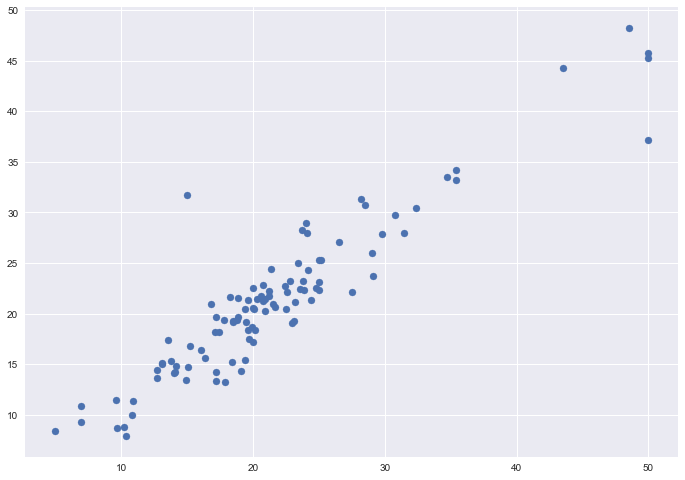

In [24]:
# plotting the y_test vs y_pred
# ideally should have been a straight line

plt.scatter(test_y, predictions);